In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
Conn = mysql.connector.connect(
    host = 'localhost',
    user='root',
    passwd='Sql@123456789',
    database='eda_practice'
)

In [5]:
query = 'select * from euromart_stores'

df = pd.read_sql(query, Conn)
df.head()

,MyUnknownColumn,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [6]:
Conn.close() #to close server connection

In [7]:
df.tail()

,MyUnknownColumn,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
8042,8042,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,245,91,2,True
8043,8043,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,30,-10,2,False
8044,8044,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,23,-6,4,True
8045,8045,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,108,-19,3,False
8046,8046,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Technology,Phones,"Motorola Audio Dock, VoIP",0.0,867,251,5,False


In [8]:
df.shape

(8047, 18)

In [9]:
df.columns

Index(['MyUnknownColumn', 'Order ID', 'Order Date', 'Customer Name', 'Country',
       'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category',
       'Sub-Category', 'Product Name', 'Discount', 'Sales', 'Profit',
       'Quantity', 'Feedback?'],
      dtype='object')

In [10]:
df.info() #since dumped from wizard it automatically deletes null values to keep it use sql command if there are more null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MyUnknownColumn  8047 non-null   int64  
 1   Order ID         8047 non-null   object 
 2   Order Date       8047 non-null   object 
 3   Customer Name    8047 non-null   object 
 4   Country          8047 non-null   object 
 5   State            8047 non-null   object 
 6   City             8047 non-null   object 
 7   Region           8047 non-null   object 
 8   Segment          8047 non-null   object 
 9   Ship Mode        8047 non-null   object 
 10  Category         8047 non-null   object 
 11  Sub-Category     8047 non-null   object 
 12  Product Name     8047 non-null   object 
 13  Discount         8047 non-null   float64
 14  Sales            8047 non-null   int64  
 15  Profit           8047 non-null   int64  
 16  Quantity         8047 non-null   int64  
 17  Feedback?     

In [11]:
df.isna().sum()

MyUnknownColumn    0
Order ID           0
Order Date         0
Customer Name      0
Country            0
State              0
City               0
Region             0
Segment            0
Ship Mode          0
Category           0
Sub-Category       0
Product Name       0
Discount           0
Sales              0
Profit             0
Quantity           0
Feedback?          0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop(['MyUnknownColumn', 'Order ID'], axis = 1, inplace = True)

In [14]:
df.head()

,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


Feature Engineering

In [15]:
df['Total_Sales'] = df['Sales']*df['Quantity']
df['Total_Profit'] = df['Profit']*df['Quantity']
df['Discount'] = df['Discount']*100
df['Discount'].astype('int')
df.head()

,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Total_Sales,Total_Profit
0,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",50.0,45,-26,3,False,135,-78
1,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True,5978,2030
2,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True,420,63
3,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",50.0,27,-22,2,True,54,-44
4,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",50.0,17,-1,2,True,34,-2


In [16]:
#import datetime as dt
df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Year'] = pd.DatetimeIndex(df['Order Date']).year


In [17]:
df.head()

,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Total_Sales,Total_Profit,Month,Year
0,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",50.0,45,-26,3,False,135,-78,1,2011
1,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True,5978,2030,1,2011
2,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True,420,63,1,2011
3,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",50.0,27,-22,2,True,54,-44,1,2011
4,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",50.0,17,-1,2,True,34,-2,1,2011


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount,8047.0,11.004722,18.177262,0.0,0.0,0.0,10.0,85.0
Sales,8047.0,291.845657,485.212156,3.0,48.0,117.0,313.0,6517.0
Profit,8047.0,35.198211,178.125844,-3060.0,1.0,14.0,47.0,2476.0
Quantity,8047.0,3.772089,2.203369,1.0,2.0,3.0,5.0,14.0
Total_Sales,8047.0,1478.685597,3725.809433,3.0,127.5,413.0,1273.0,80206.0
Total_Profit,8047.0,171.491736,1325.429134,-36720.0,1.0,40.0,181.0,29712.0
Month,8047.0,7.365229,3.321485,1.0,5.0,8.0,10.0,12.0
Year,8047.0,2012.728843,1.100264,2011.0,2012.0,2013.0,2014.0,2014.0


In [19]:
df.describe(include='object').T

,count,unique,top,freq
Order Date,8047,1214,2014-11-12,32
Customer Name,8047,792,Joel Peters,32
Country,8047,15,France,1916
State,8047,127,England,1187
City,8047,999,London,219
Region,8047,3,Central,4426
Segment,8047,3,Consumer,4174
Ship Mode,8047,4,Economy,4862
Category,8047,3,Office Supplies,5286
Sub-Category,8047,17,Art,1152


In [20]:
df.drop(['Order Date'], axis=1, inplace=True)

In [21]:
cat_col = df.select_dtypes(include = 'object').columns
num_col = df.select_dtypes(include = np.number).columns.tolist()

print(cat_col)
print(num_col)

Index(['Customer Name', 'Country', 'State', 'City', 'Region', 'Segment',
       'Ship Mode', 'Category', 'Sub-Category', 'Product Name', 'Feedback?'],
      dtype='object')
['Discount', 'Sales', 'Profit', 'Quantity', 'Total_Sales', 'Total_Profit', 'Month', 'Year']


Univariate Analysis

 Discount 


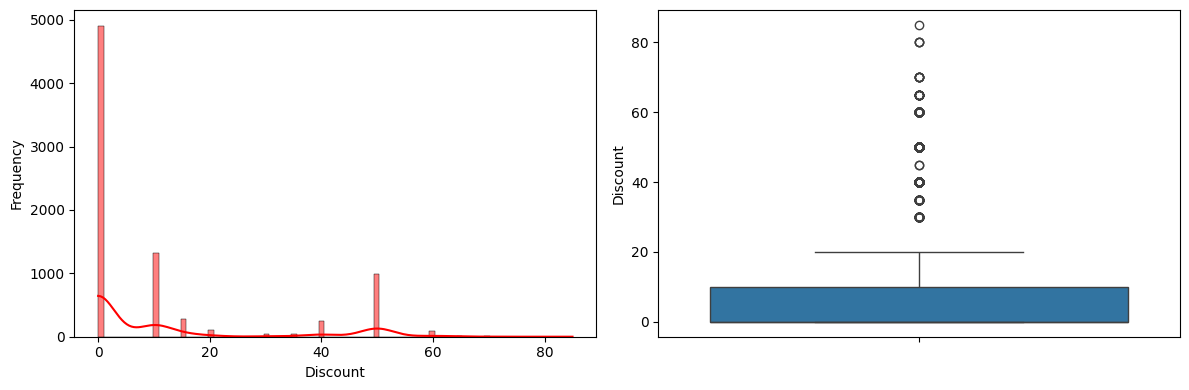

 Sales 


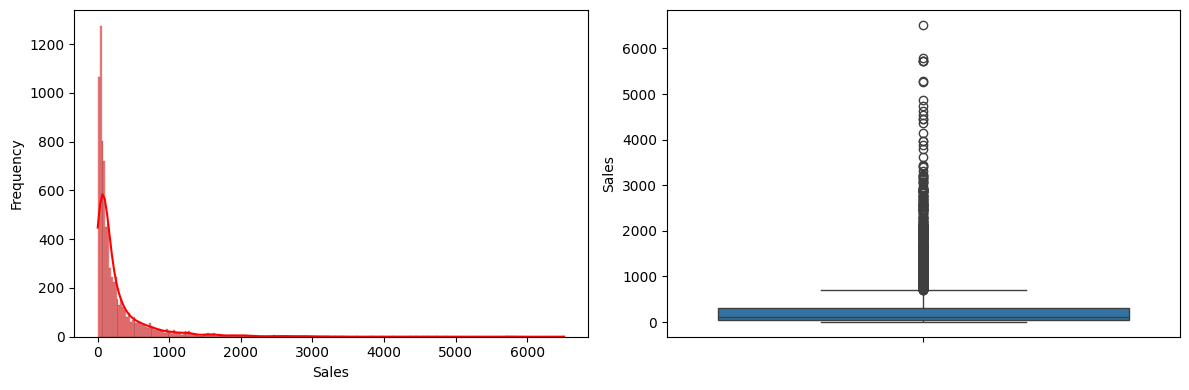

 Profit 


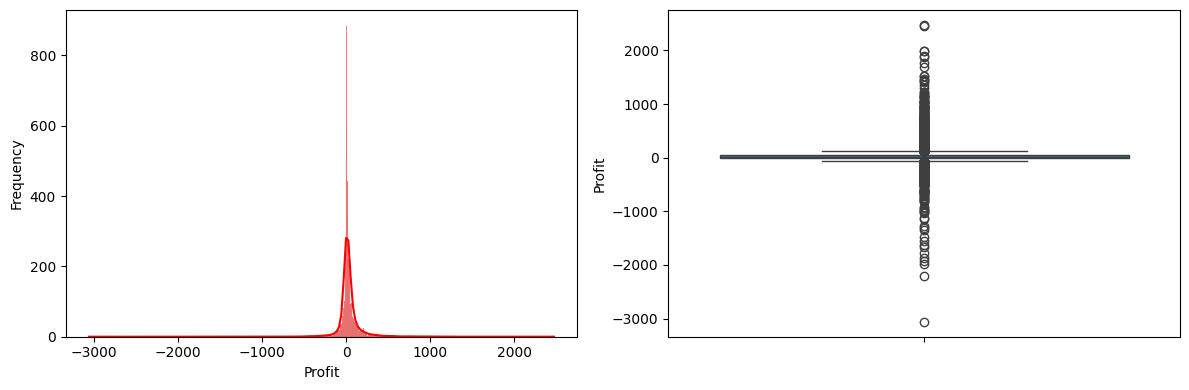

 Quantity 


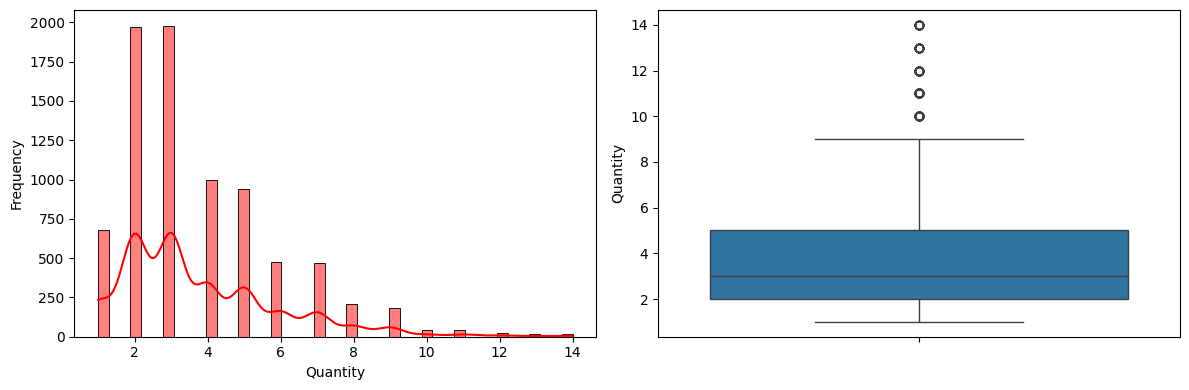

 Total_Sales 


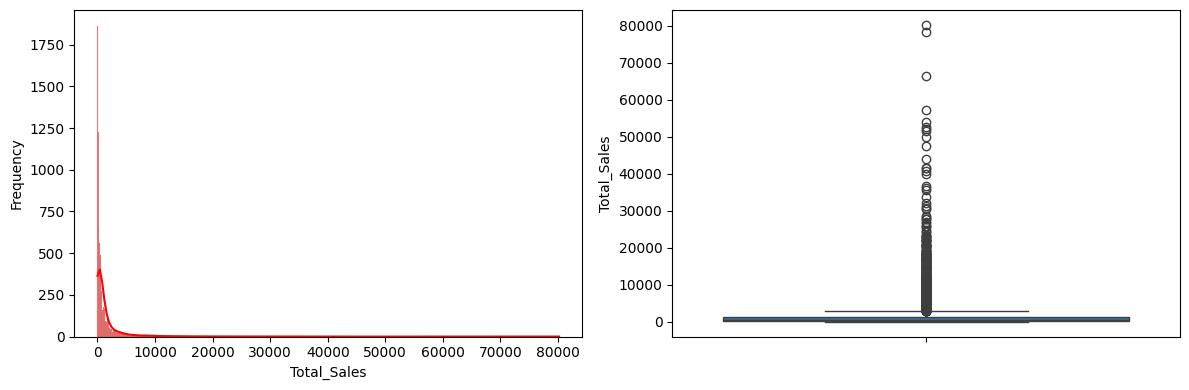

 Total_Profit 


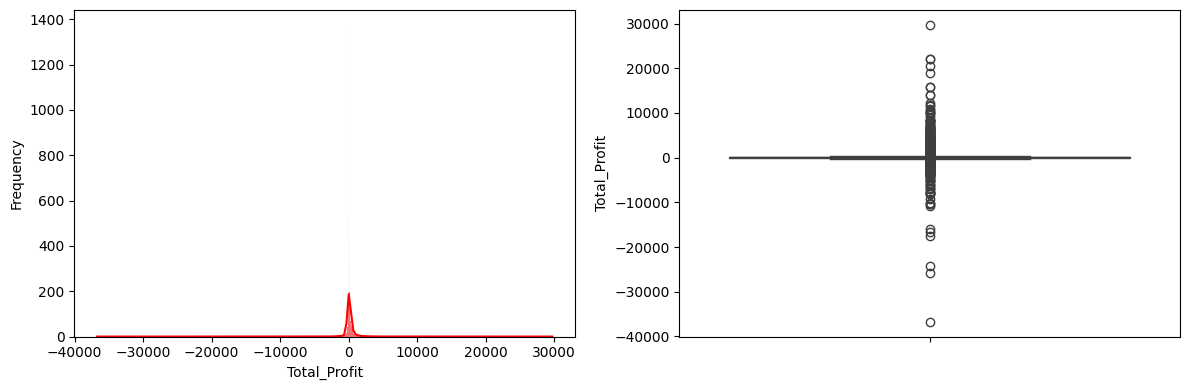

 Month 


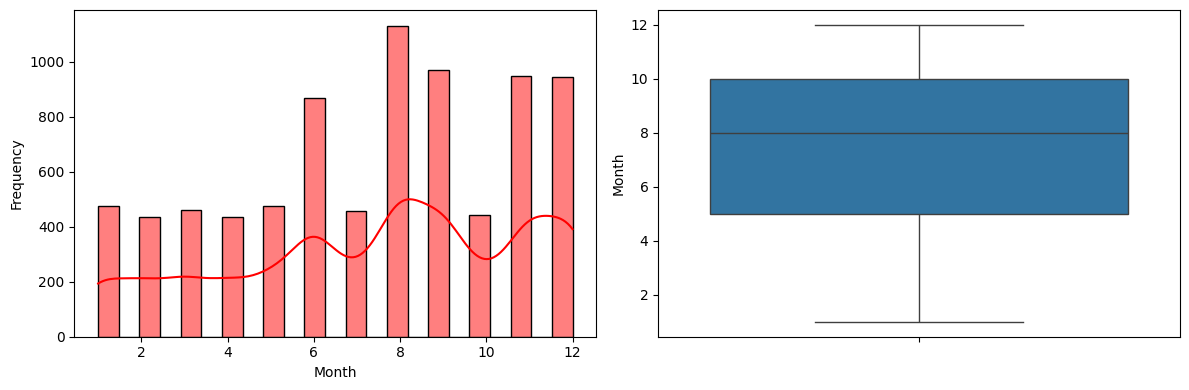

 Year 


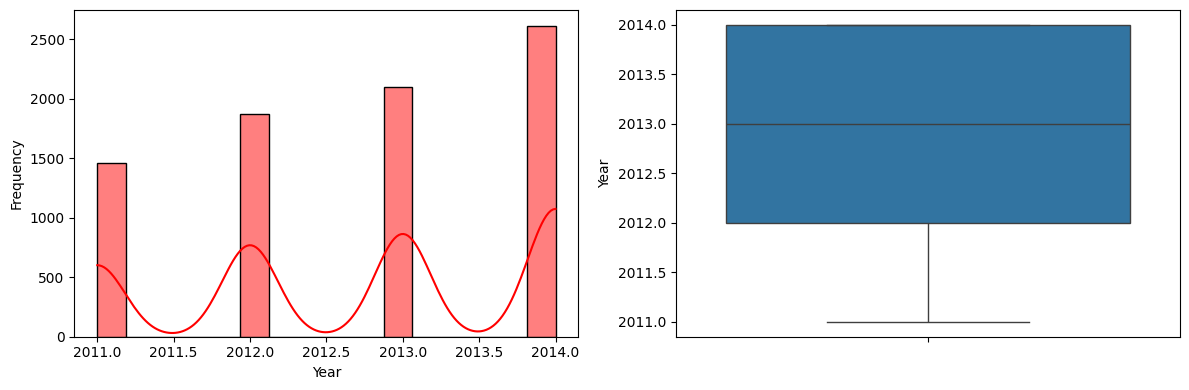

In [22]:
for col in num_col:
    print('\033[1m',col, '\033[0m')

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde= True,color = 'Red')
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

    plt.tight_layout()
    plt.show()

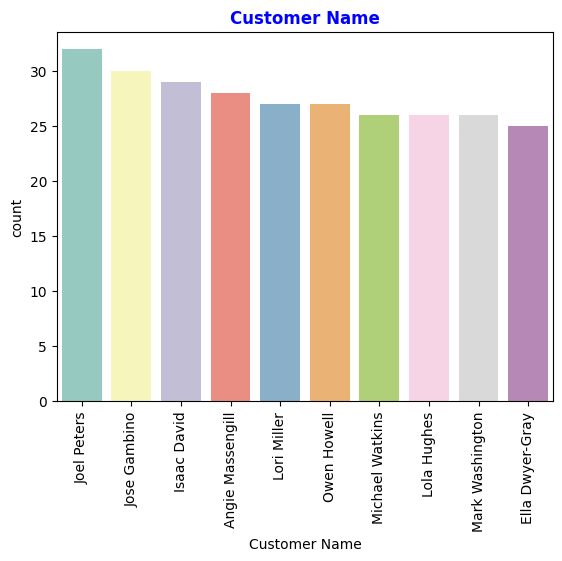

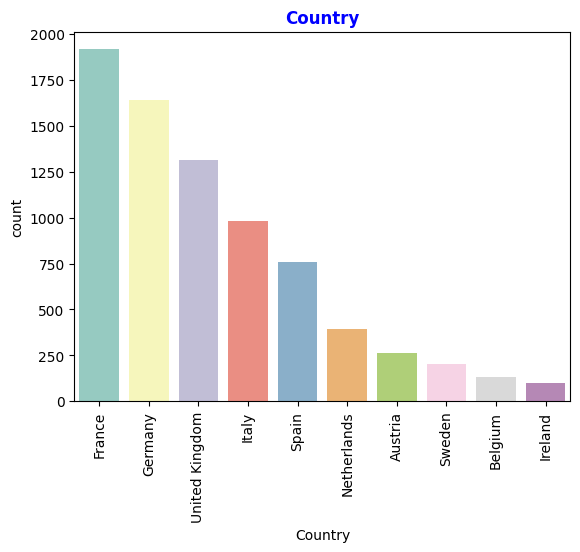

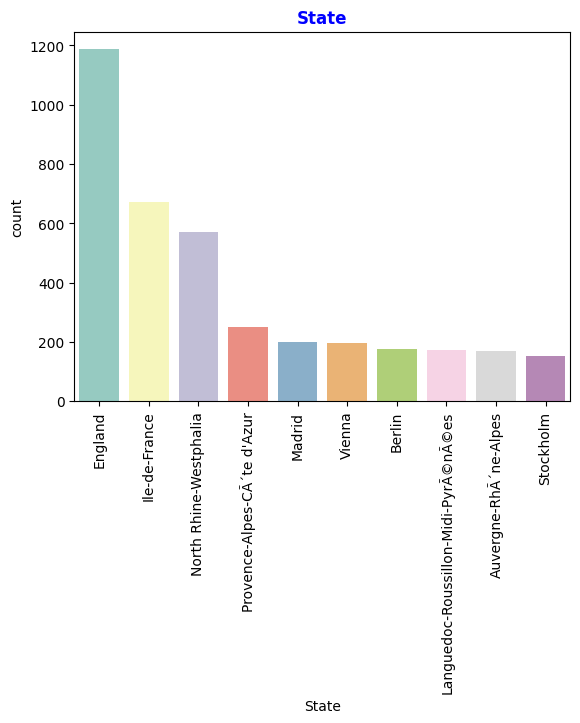

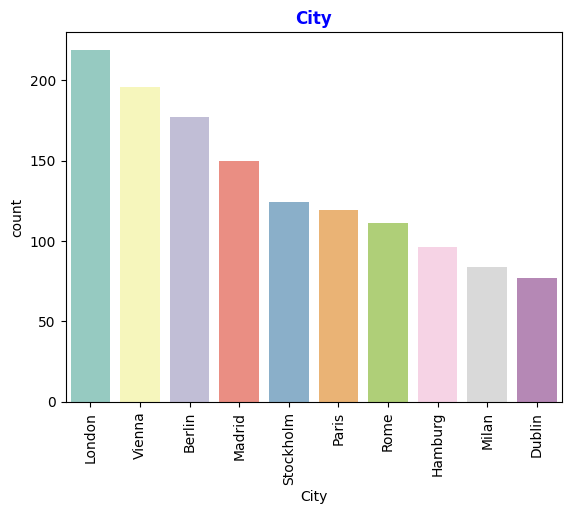

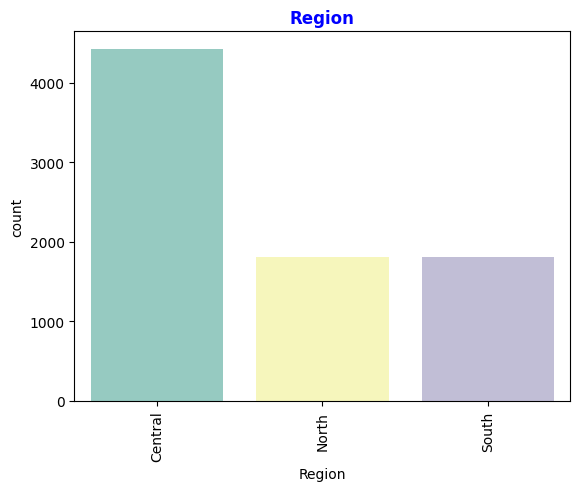

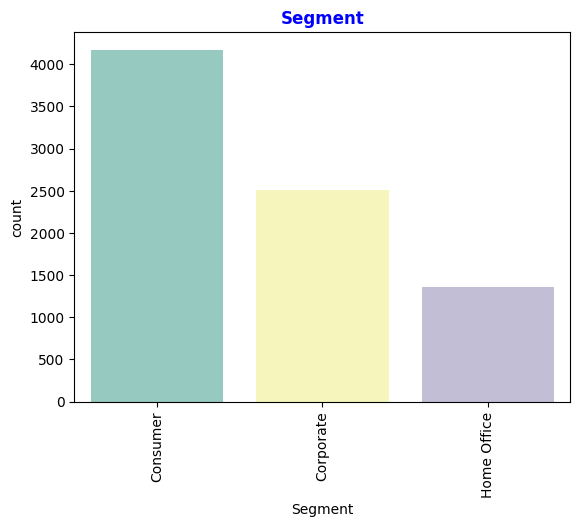

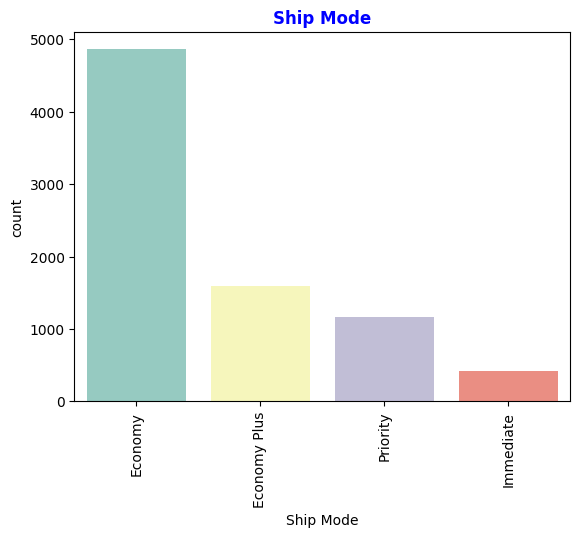

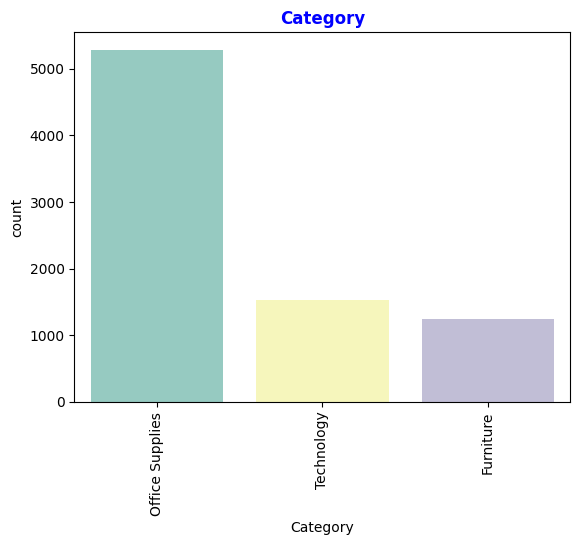

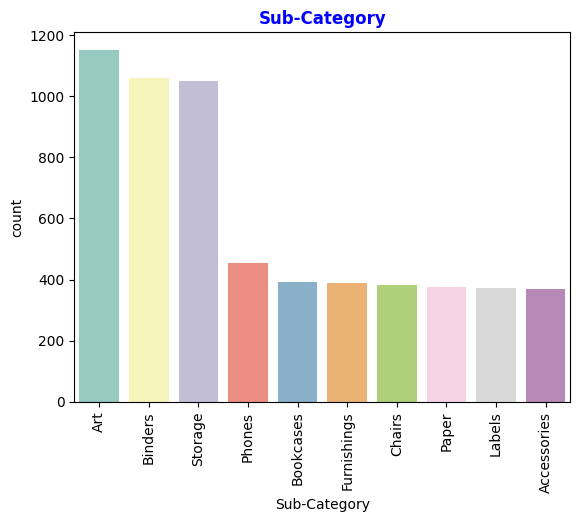

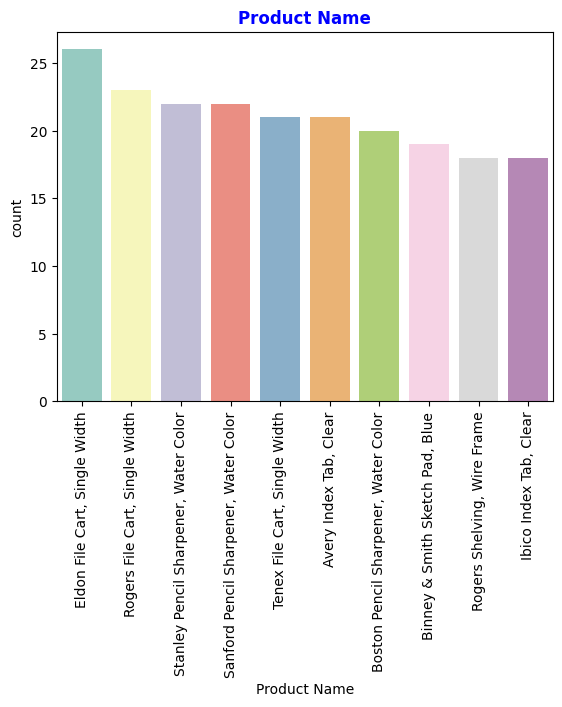

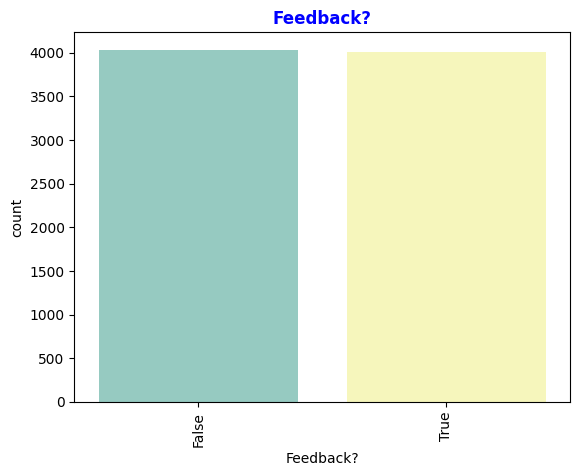

In [23]:
for col in cat_col:

    sns.countplot(x=df[col], order = df[col].value_counts().head(10).index, palette= 'Set3')
    plt.xticks(rotation = 90)
    plt.title(col, fontweight ='bold',color ='Blue')
    plt.show()

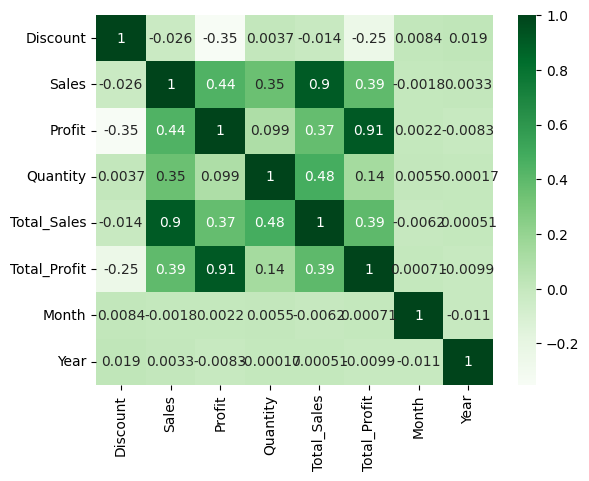

In [24]:
corr = df[num_col].corr()

sns.heatmap(corr, annot = True, cmap = 'Greens') #sales,profit and quantity
plt.show()

In [25]:
print('Total Sales', df['Sales'].sum())

Total Sales 2348482


In [26]:
print('Total Profit', df['Profit'].sum())

Total Profit 283240


In [27]:
print('Profit Margin', (df['Profit'].sum()/df['Sales'].sum())*100)

Profit Margin 12.060556563771833


In [28]:
Year_Analysis = df.groupby('Year').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).reset_index()
Year_Analysis

,Year,Sales,Profit,Quantity
0,2014,755030,85330,9833
1,2013,630224,77200,7938
2,2012,548880,66223,7099
3,2011,414348,54487,5484


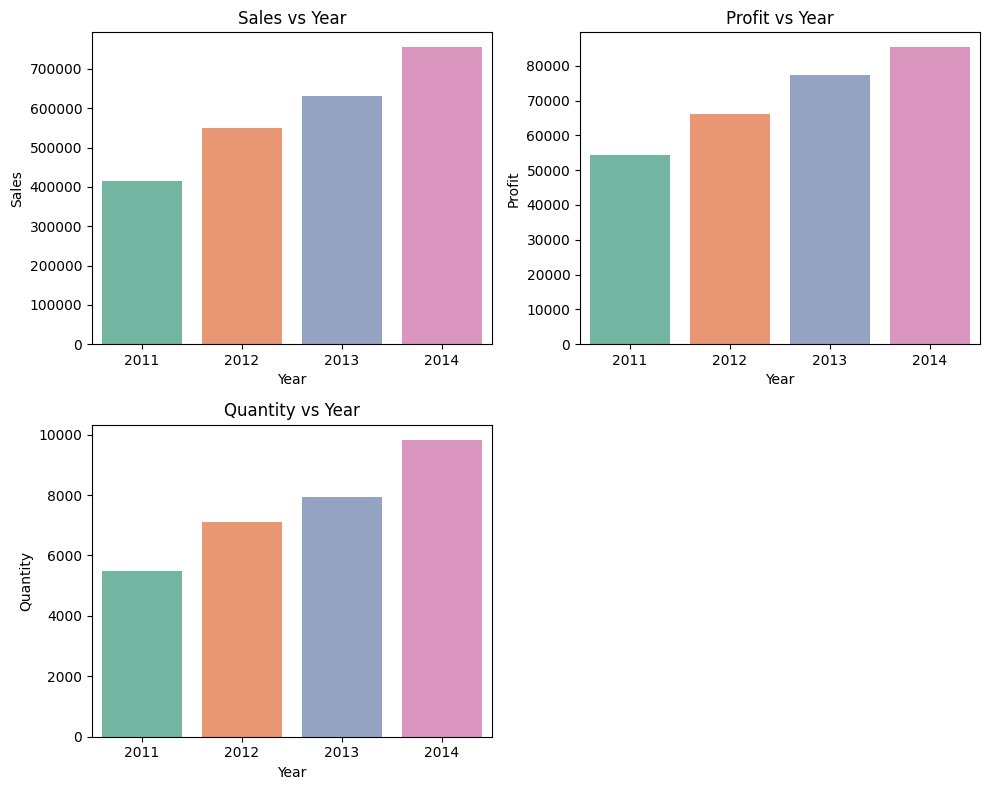

In [29]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x='Year', y = 'Sales', data = Year_Analysis, palette = 'Set2')
plt.title('Sales vs Year')

plt.subplot(2,2,2)
sns.barplot(x='Year', y = 'Profit', data = Year_Analysis, palette = 'Set2')
plt.title('Profit vs Year')

plt.subplot(2,2,3)
sns.barplot(x='Year', y = 'Quantity', data = Year_Analysis, palette = 'Set2')
plt.title('Quantity vs Year')

plt.tight_layout()
plt.show()

In [30]:
Month_Analysis = df.groupby('Month').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).reset_index()
Month_Analysis

,Month,Sales,Profit,Quantity
0,8,303126,38486,4210
1,9,295289,37423,3695
2,11,277239,28533,3687
3,12,272751,34103,3556
4,6,271828,31797,3294
5,7,146159,16694,1695
6,5,142461,16171,1778
7,1,139157,17507,1753
8,4,132051,16004,1686
9,2,123685,14482,1618


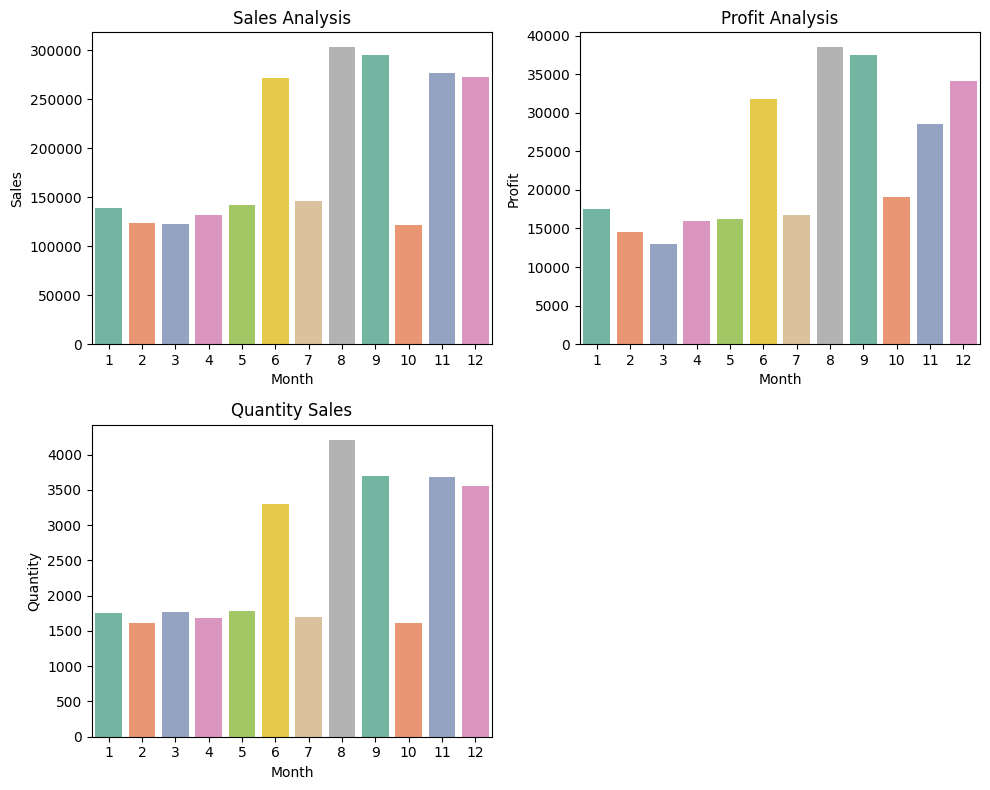

In [31]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x='Month', y = 'Sales', data = Month_Analysis, palette = 'Set2')
plt.title('Sales Analysis')

plt.subplot(2,2,2)
sns.barplot(x='Month', y = 'Profit', data = Month_Analysis, palette = 'Set2')
plt.title('Profit Analysis')

plt.subplot(2,2,3)
sns.barplot(x='Month', y = 'Quantity', data = Month_Analysis, palette = 'Set2')
plt.title('Quantity Sales')

plt.tight_layout()
plt.show()

In [32]:
df.columns

Index(['Customer Name', 'Country', 'State', 'City', 'Region', 'Segment',
       'Ship Mode', 'Category', 'Sub-Category', 'Product Name', 'Discount',
       'Sales', 'Profit', 'Quantity', 'Feedback?', 'Total_Sales',
       'Total_Profit', 'Month', 'Year'],
      dtype='object')

In [33]:
Country_Analysis = df.groupby('Country').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).head(10).reset_index()
Country_Analysis

,Country,Sales,Profit,Quantity
0,France,609683,70067,7329
1,Germany,488681,86279,6179
2,United Kingdom,420497,90382,4917
3,Italy,252742,15802,3612
4,Spain,249402,47067,2881
5,Austria,79382,21332,973
6,Netherlands,70313,-37188,1526
7,Belgium,42320,9912,532
8,Sweden,30490,-17524,753
9,Switzerland,24874,7234,308


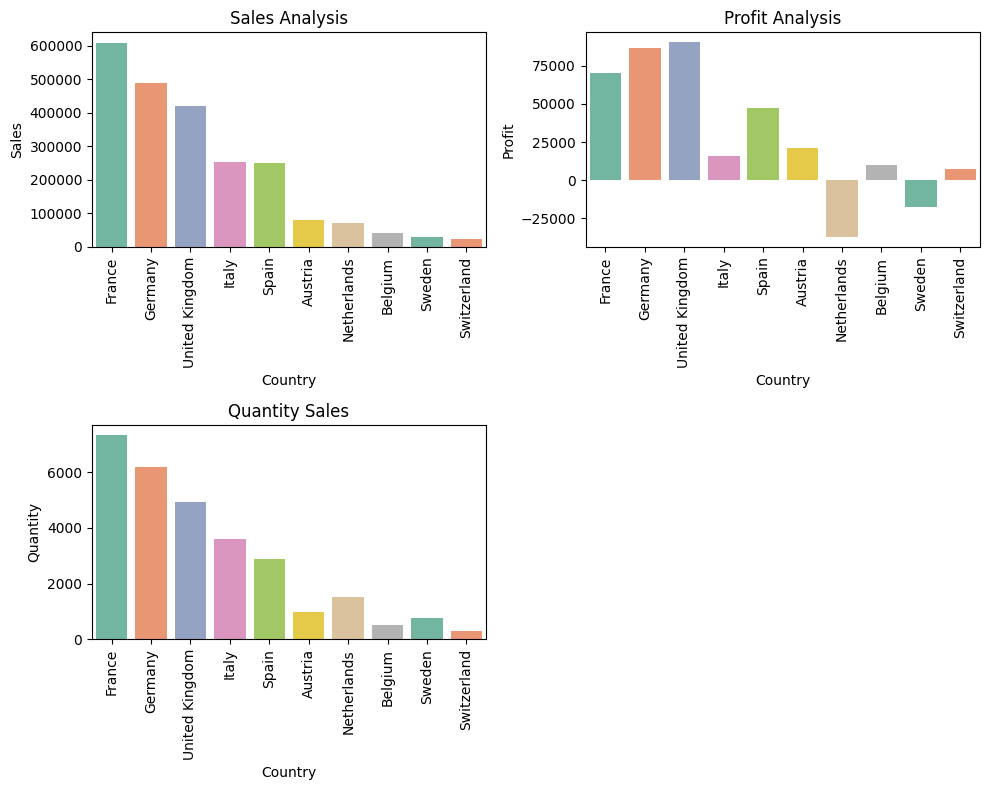

In [34]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x='Country', y = 'Sales', data = Country_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Sales Analysis')

plt.subplot(2,2,2)
sns.barplot(x='Country', y = 'Profit', data = Country_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Profit Analysis')

plt.subplot(2,2,3)
sns.barplot(x='Country', y = 'Quantity', data = Country_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Quantity Sales')

plt.tight_layout()
plt.show()

In [35]:
State_Analysis = df.groupby('State').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).head(10).reset_index()
State_Analysis

,State,Sales,Profit,Quantity
0,England,378984,79069,4437
1,Ile-de-France,230138,29457,2644
2,North Rhine-Westphalia,170233,32572,2083
3,Provence-Alpes-CÃ´te d'Azur,81524,11615,940
4,Madrid,57207,13273,752
5,Auvergne-RhÃ´ne-Alpes,55572,9283,658
6,Berlin,52555,5942,690
7,Nord-Pas-de-Calais-Picardie,52007,5207,547
8,Vienna,51844,13207,714
9,Bavaria,49103,9490,540


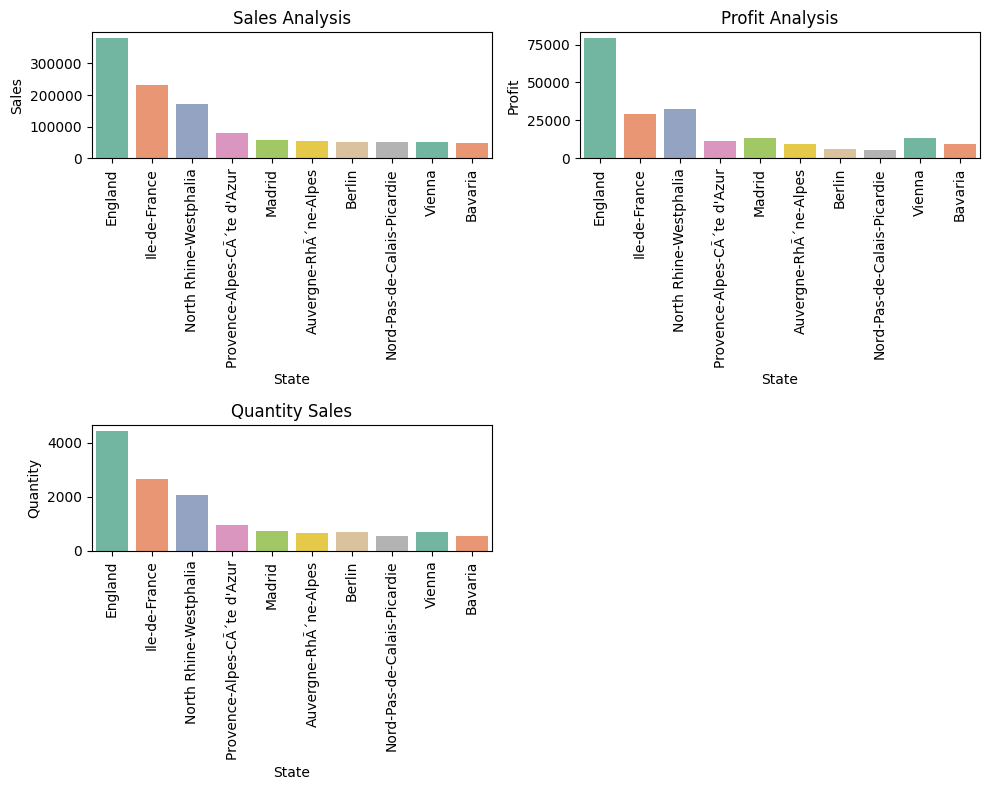

In [36]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x='State', y = 'Sales', data = State_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Sales Analysis')

plt.subplot(2,2,2)
sns.barplot(x='State', y = 'Profit', data = State_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Profit Analysis')

plt.subplot(2,2,3)
sns.barplot(x='State', y = 'Quantity', data = State_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Quantity Sales')

plt.tight_layout()
plt.show()

In [37]:
City_Analysis = df.groupby('City').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).head(10).reset_index()
City_Analysis

,City,Sales,Profit,Quantity
0,London,69230,13931,820
1,Berlin,52555,5942,690
2,Vienna,51844,13207,714
3,Madrid,44981,11129,580
4,Paris,42245,6680,496
5,Rome,28330,191,409
6,Barcelona,27405,2246,231
7,Hamburg,23574,5858,385
8,Marseille,21677,2889,283
9,Turin,19829,1937,236


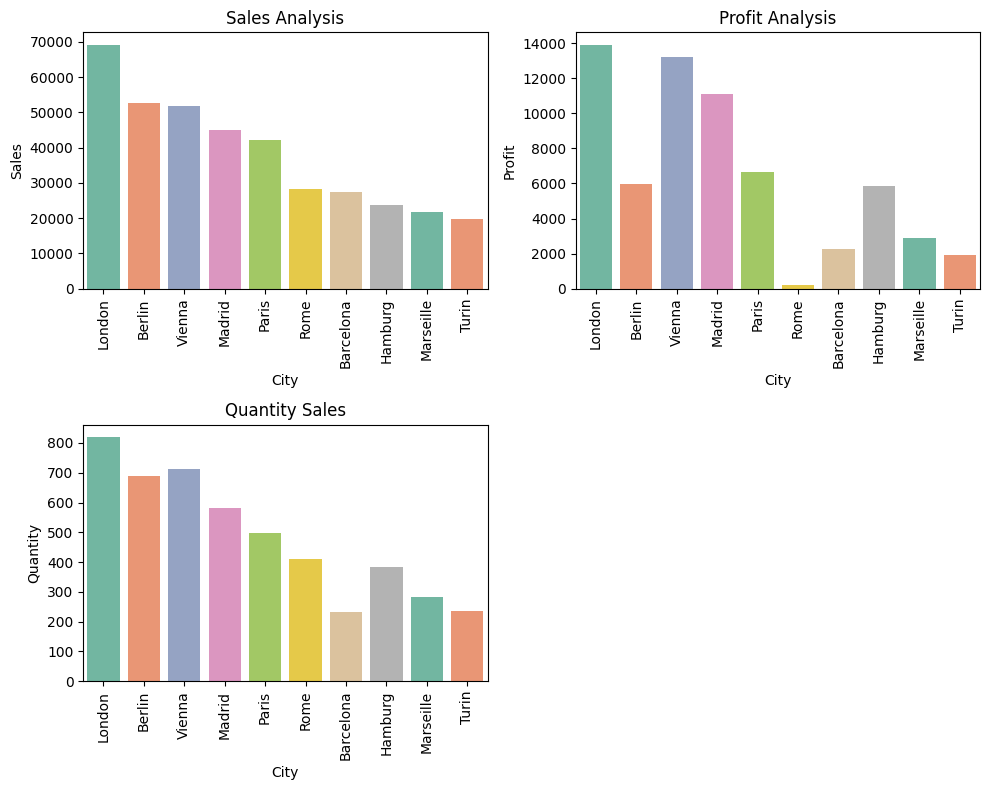

In [38]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x='City', y = 'Sales', data = City_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Sales Analysis')

plt.subplot(2,2,2)
sns.barplot(x='City', y = 'Profit', data = City_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Profit Analysis')

plt.subplot(2,2,3)
sns.barplot(x='City', y = 'Quantity', data = City_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Quantity Sales')

plt.tight_layout()
plt.show()

In [39]:
Region_Analysis = df.groupby('Region').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).reset_index()
Region_Analysis

,Region,Sales,Profit,Quantity
0,Central,1315253,157636,16847
1,South,517250,54165,6779
2,North,515979,71439,6728


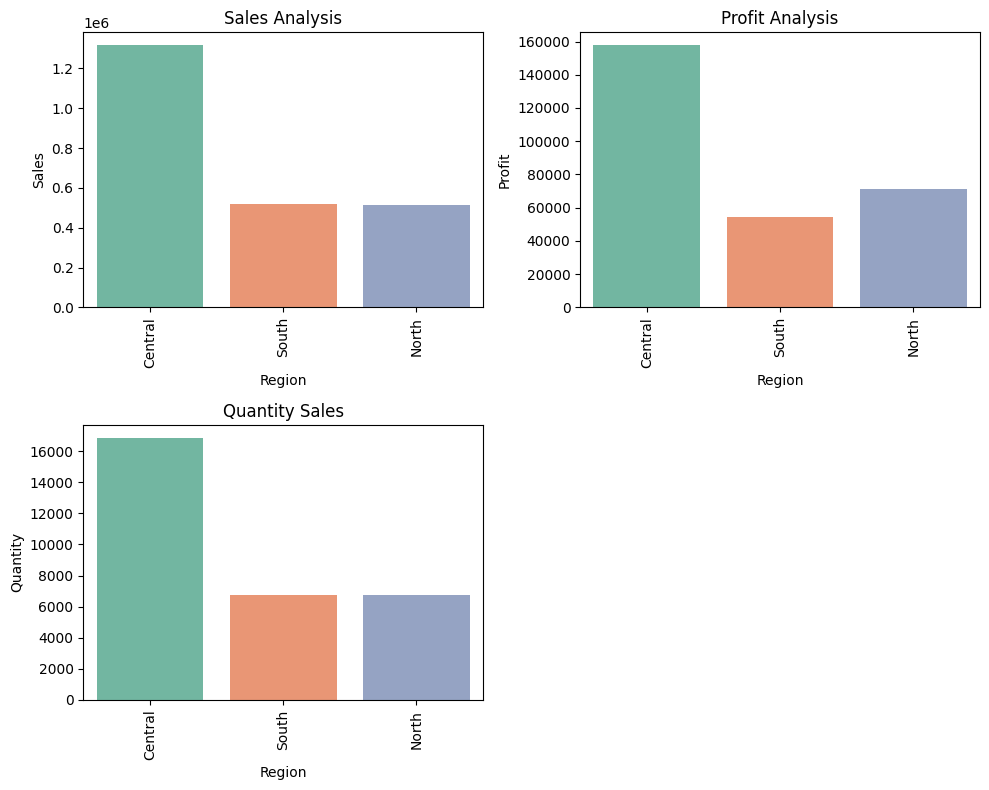

In [40]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x='Region', y = 'Sales', data = Region_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Sales Analysis')

plt.subplot(2,2,2)
sns.barplot(x='Region', y = 'Profit', data = Region_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Profit Analysis')

plt.subplot(2,2,3)
sns.barplot(x='Region', y = 'Quantity', data = Region_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Quantity Sales')

plt.tight_layout()
plt.show()

In [41]:
Segment_Analysis = df.groupby('Segment').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).reset_index()
Segment_Analysis

,Segment,Sales,Profit,Quantity
0,Consumer,1236282,147447,15716
1,Corporate,738137,92634,9498
2,Home Office,374063,43159,5140


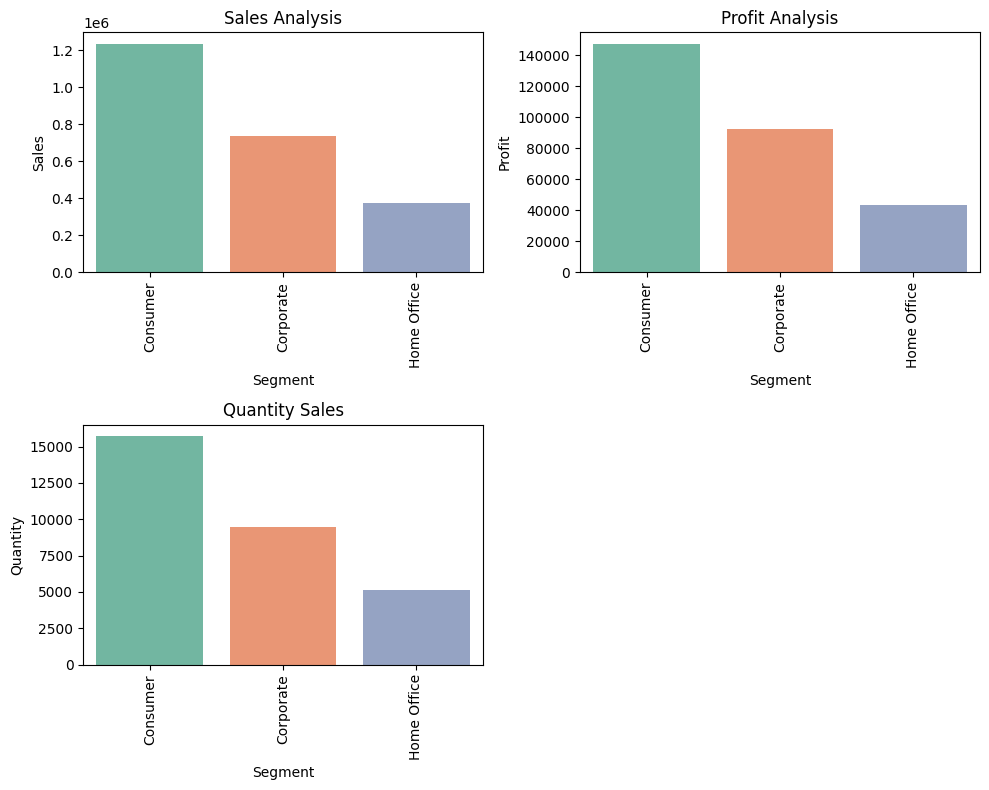

In [42]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x='Segment', y = 'Sales', data = Segment_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Sales Analysis')

plt.subplot(2,2,2)
sns.barplot(x='Segment', y = 'Profit', data = Segment_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Profit Analysis')

plt.subplot(2,2,3)
sns.barplot(x='Segment', y = 'Quantity', data = Segment_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Quantity Sales')

plt.tight_layout()
plt.show()

In [43]:
Ship_Mode_Analysis = df.groupby('Ship Mode').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).reset_index()
Ship_Mode_Analysis

,Ship Mode,Sales,Profit,Quantity
0,Economy,1412777,178696,18390
1,Economy Plus,483965,54336,6000
2,Priority,320426,32639,4405
3,Immediate,131314,17569,1559


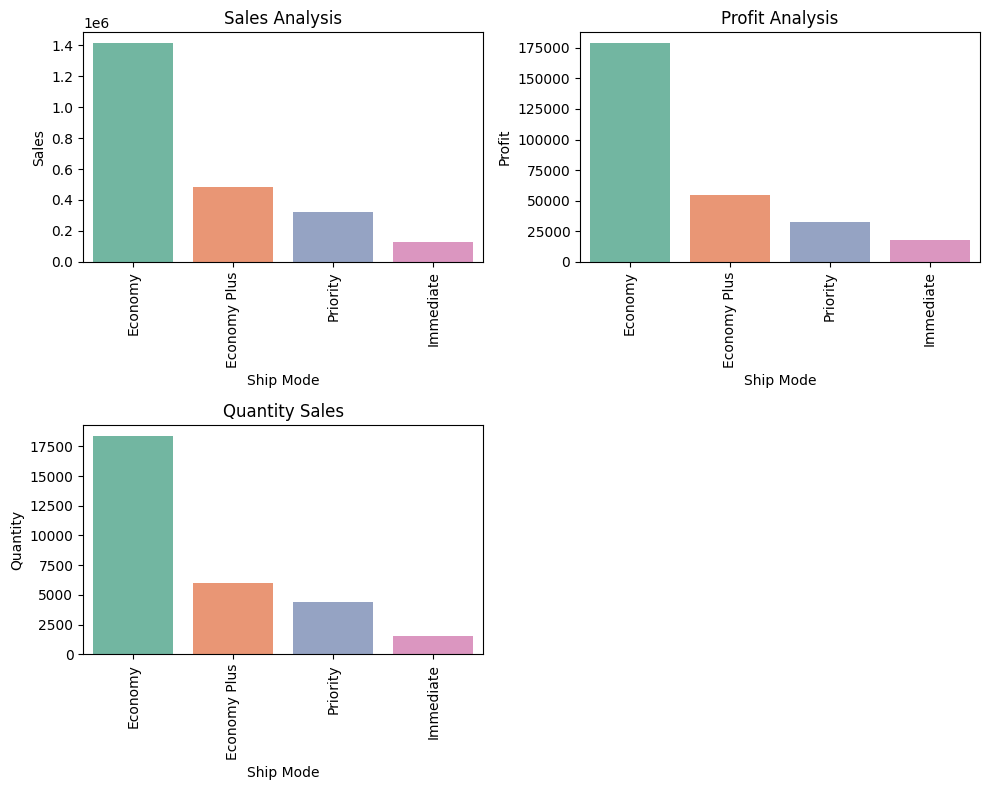

In [44]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x='Ship Mode', y = 'Sales', data = Ship_Mode_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Sales Analysis')

plt.subplot(2,2,2)
sns.barplot(x='Ship Mode', y = 'Profit', data = Ship_Mode_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Profit Analysis')

plt.subplot(2,2,3)
sns.barplot(x='Ship Mode', y = 'Quantity', data = Ship_Mode_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Quantity Sales')

plt.tight_layout()
plt.show()

In [45]:
Category_Analysis = df.groupby('Category').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).reset_index()
Category_Analysis

,Category,Sales,Profit,Quantity
0,Technology,886015,108554,5811
1,Office Supplies,823658,124952,19902
2,Furniture,638809,49734,4641


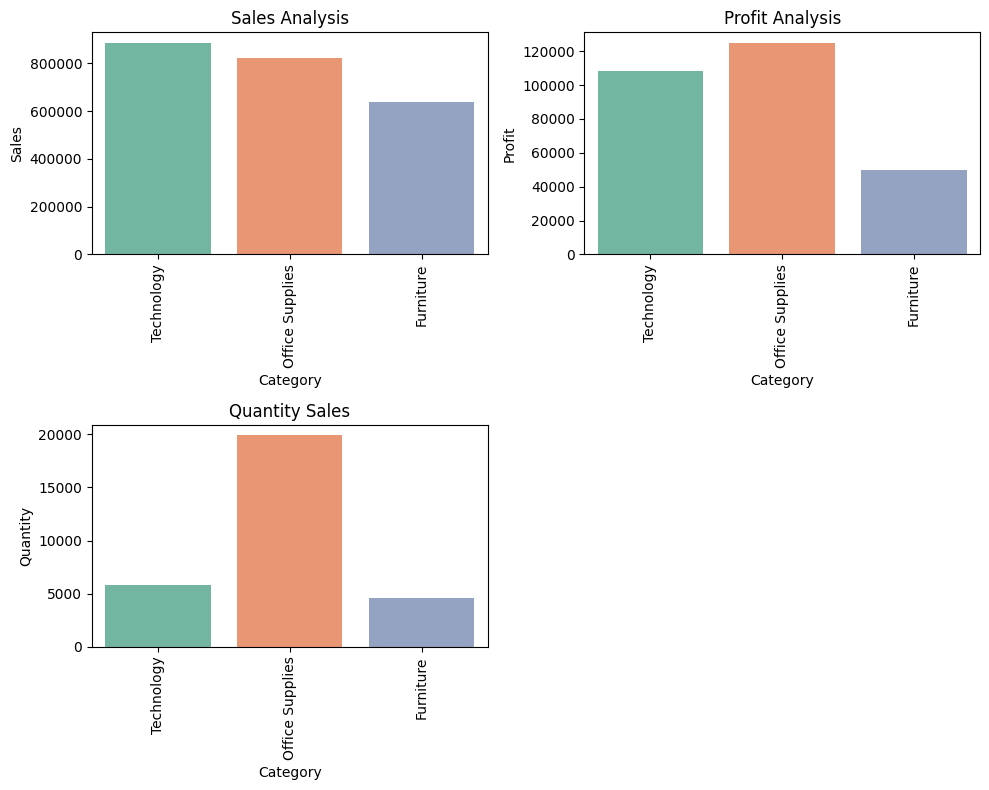

In [46]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x='Category', y = 'Sales', data = Category_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Sales Analysis')

plt.subplot(2,2,2)
sns.barplot(x='Category', y = 'Profit', data = Category_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Profit Analysis')

plt.subplot(2,2,3)
sns.barplot(x='Category', y = 'Quantity', data = Category_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Quantity Sales')

plt.tight_layout()
plt.show()

In [47]:
SubCategory_Analysis = df.groupby('Sub-Category').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).reset_index()
SubCategory_Analysis

,Sub-Category,Sales,Profit,Quantity
0,Bookcases,294396,43655,1426
1,Copiers,290081,42775,1367
2,Phones,282559,27631,1743
3,Storage,272489,21995,3887
4,Appliances,209900,37906,888
5,Chairs,186698,15489,1459
6,Machines,182066,11318,1249
7,Accessories,131309,26830,1452
8,Art,127184,23491,4329
9,Tables,89478,-20731,287


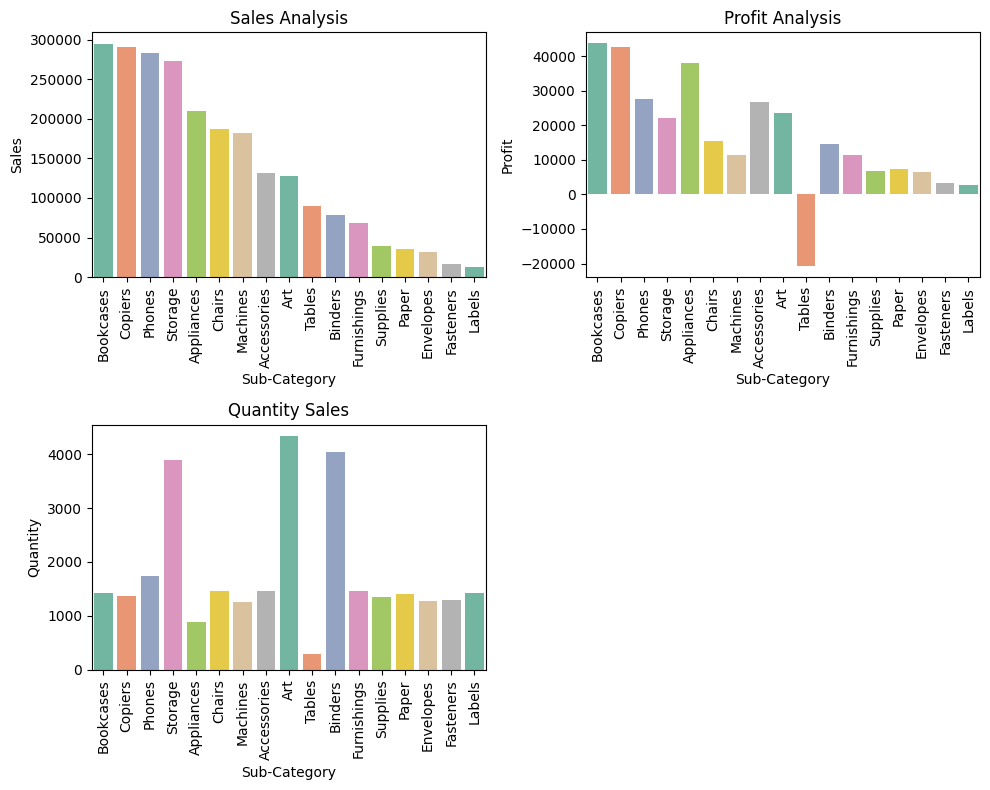

In [48]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x='Sub-Category', y = 'Sales', data = SubCategory_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Sales Analysis')

plt.subplot(2,2,2)
sns.barplot(x='Sub-Category', y = 'Profit', data = SubCategory_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Profit Analysis')

plt.subplot(2,2,3)
sns.barplot(x='Sub-Category', y = 'Quantity', data = SubCategory_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Quantity Sales')

plt.tight_layout()
plt.show()

In [49]:
Product_Name_Analysis = df.groupby('Product Name').agg({
    'Sales':'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by = 'Sales', ascending=False).head().reset_index()
Product_Name_Analysis

,Product Name,Sales,Profit,Quantity
0,"Nokia Smart Phone, Full Size",30645,7583,54
1,"Hamilton Beach Stove, Silver",16890,5778,33
2,"Cisco Smart Phone, Cordless",14723,3388,29
3,"Novimex Executive Leather Armchair, Red",13898,736,44
4,"Cisco Smart Phone, with Caller ID",13215,4055,25


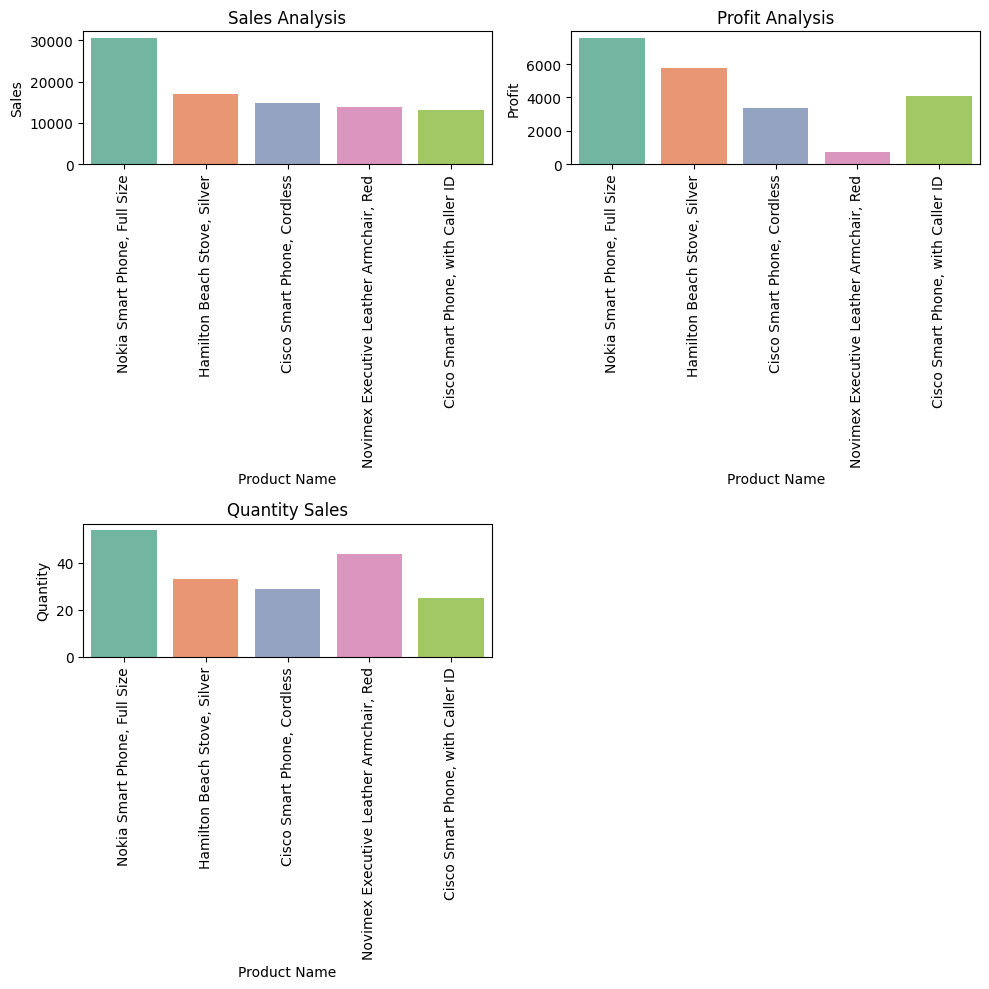

In [50]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(x='Product Name', y = 'Sales', data = Product_Name_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Sales Analysis')

plt.subplot(2,2,2)
sns.barplot(x='Product Name', y = 'Profit', data = Product_Name_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Profit Analysis')

plt.subplot(2,2,3)
sns.barplot(x='Product Name', y = 'Quantity', data = Product_Name_Analysis, palette = 'Set2')
plt.xticks(rotation = 90)
plt.title('Quantity Sales')

plt.tight_layout()
plt.show()

In [51]:
df.columns

Index(['Customer Name', 'Country', 'State', 'City', 'Region', 'Segment',
       'Ship Mode', 'Category', 'Sub-Category', 'Product Name', 'Discount',
       'Sales', 'Profit', 'Quantity', 'Feedback?', 'Total_Sales',
       'Total_Profit', 'Month', 'Year'],
      dtype='object')

In [52]:
Discount_Analysis = df.groupby('Discount').agg({
    'Sales':'mean',
    'Profit': 'mean'
}).sort_values(by = 'Profit', ascending=False)
Discount_Analysis

,Sales,Profit
Discount,,
10.0,435.480608,72.676046
0.0,251.144429,63.794867
15.0,668.515679,58.010453
20.0,334.927273,15.500000
30.0,123.800000,-15.875000
40.0,261.167347,-78.644898
50.0,169.157841,-88.042770
80.0,46.333333,-142.000000
60.0,206.760417,-155.718750


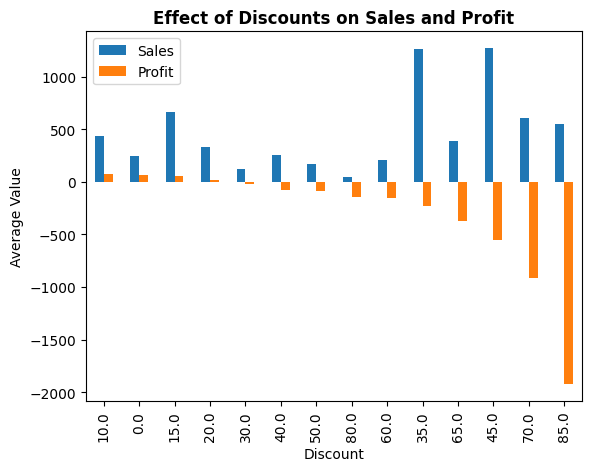

In [53]:
Discount_Analysis.plot.bar()
plt.title("Effect of Discounts on Sales and Profit", fontweight ='bold')
plt.ylabel("Average Value")
plt.show()

In [54]:
product_quantity = df.groupby('Product Name')['Quantity'].sum().reset_index()

product_quantity_sorted = product_quantity.sort_values(by='Quantity', ascending = False)

top_5_products = product_quantity_sorted.head(5)

print(top_5_products)

                               Product Name  Quantity
1367         Rogers File Cart, Single Width       108
582           Eldon File Cart, Single Width       104
293         Binney & Smith Sketch Pad, Blue        90
1645  Stanley Pencil Sharpener, Water Color        89
183                  Avery Index Tab, Clear        81


In [55]:
feedback_analysis = df.groupby('Feedback?').agg({'Sales': 'count'}).reset_index()
print(feedback_analysis)

  Feedback?  Sales
0     False   4033
1      True   4014


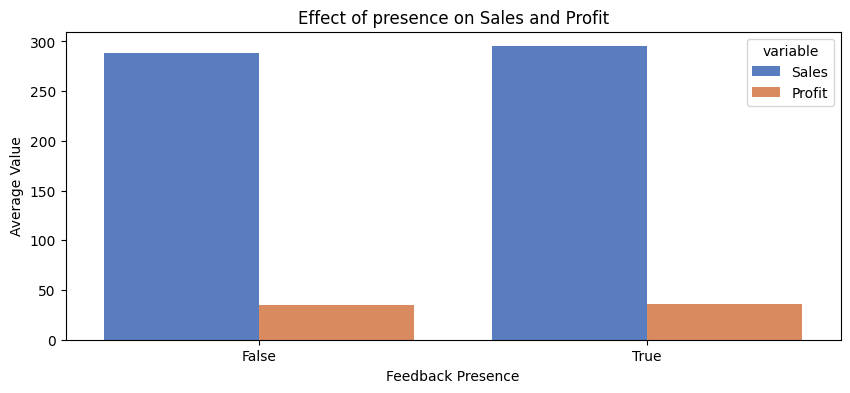

In [56]:
feedback_analysis = df.groupby('Feedback?').agg({'Sales':'mean','Profit':'mean'}).reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x= 'Feedback?', y = 'value', hue='variable', data = pd.melt(feedback_analysis, id_vars='Feedback?'),palette='muted')

plt.xlabel('Feedback Presence')
plt.ylabel('Average Value')
plt.title('Effect of presence on Sales and Profit')

plt.show()

In [57]:
feedback_counts = df.groupby(['Product Name', 'Category']).agg({'Feedback?': 'count'}).reset_index()

feedback_counts_sorted = feedback_counts.sort_values(by='Feedback?', ascending=False)

print("Products or categories with the most feedback:")
print(feedback_counts_sorted.head(10))

Products or categories with the most feedback:
                               Product Name         Category  Feedback?
582           Eldon File Cart, Single Width  Office Supplies         26
1367         Rogers File Cart, Single Width  Office Supplies         23
1645  Stanley Pencil Sharpener, Water Color  Office Supplies         22
1532  Sanford Pencil Sharpener, Water Color  Office Supplies         22
1732          Tenex File Cart, Single Width  Office Supplies         21
183                  Avery Index Tab, Clear  Office Supplies         21
311    Boston Pencil Sharpener, Water Color  Office Supplies         20
293         Binney & Smith Sketch Pad, Blue  Office Supplies         19
993                  Ibico Index Tab, Clear  Office Supplies         18
1379            Rogers Shelving, Wire Frame  Office Supplies         18


In [58]:
df['Feedback?'].unique()

array(['False', 'True'], dtype=object)

In [59]:
true_feedback = df[df['Feedback?'] == 'True']
true_feedback.groupby('Product Name')['Feedback?'].count().sort_values(ascending=False).head()

Product Name
Eldon File Cart, Single Width            14
Nokia Smart Phone, Full Size             13
Sanford Pencil Sharpener, Water Color    13
Tenex File Cart, Single Width            12
Ibico Index Tab, Clear                   11
Name: Feedback?, dtype: int64

In [60]:
true_feedback = df[df['Feedback?'] == 'False']
true_feedback.groupby('Product Name')['Feedback?'].count().sort_values(ascending=False).head()

Product Name
Avery Index Tab, Clear                    14
Rogers File Cart, Single Width            14
Stanley Pencil Sharpener, Water Color     12
Eldon File Cart, Single Width             12
Binney & Smith Sketch Pad, Water Color    11
Name: Feedback?, dtype: int64

In [61]:
Ship_Mode_Analysis = df.groupby('Ship Mode').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index().sort_values(by='Sales', ascending=False).style.background_gradient(cmap='Blues')
Ship_Mode_Analysis

,Ship Mode,Sales,Profit
2,Immediate,308.248826,41.241784
1,Economy Plus,304.380503,34.173585
0,Economy,290.575278,36.753599
3,Priority,274.102652,27.920445


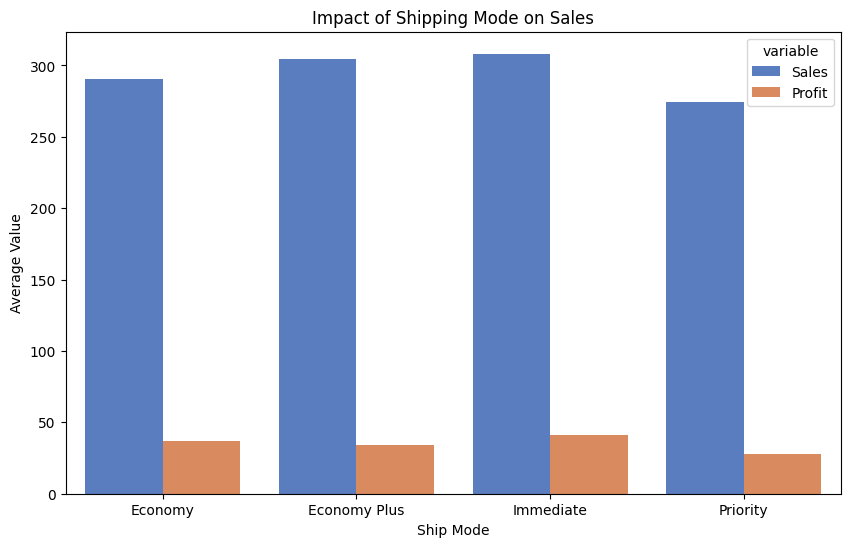

In [62]:
# Group data by 'Discount' and calculate average sales and profit for each group
Ship_Mode_Analysis = df.groupby('Ship Mode').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Melt and plot the DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='value', hue='variable', data=pd.melt(Ship_Mode_Analysis, id_vars='Ship Mode'), palette='muted')

# Adding labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Average Value')
plt.title('Impact of Shipping Mode on Sales')

# Display the plot
plt.show()